<a href="https://colab.research.google.com/github/Nawapon19/ML-Practice/blob/main/Image_compression_using_K_means_clustering_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image compression using K-means clustering**

The internet is filled with huge amounts of data in the form of images. People upload millions of pictures every day on social media sites such as Instagram, and Facebook and cloud storage platforms such as google drive, etc. With such large amounts of data, image compression techniques become important to compress the images and reduce storage space.

An image is made up of several intensity values known as Pixels. In a colored image, each pixel is of 3 bytes containing RGB (Red-Blue-Green) values having Red intensity value, then Blue and then Green intensity value for each pixel.

**Approach:** K-means clustering will group similar colors together into ‘k’ clusters (say k=64) of different colors (RGB values). Therefore, each cluster centroid is representative of the color vector in the RGB color space of its respective cluster. Now, these ‘k’ cluster centroids will replace all the color vectors in their respective clusters.

**Input Image:** 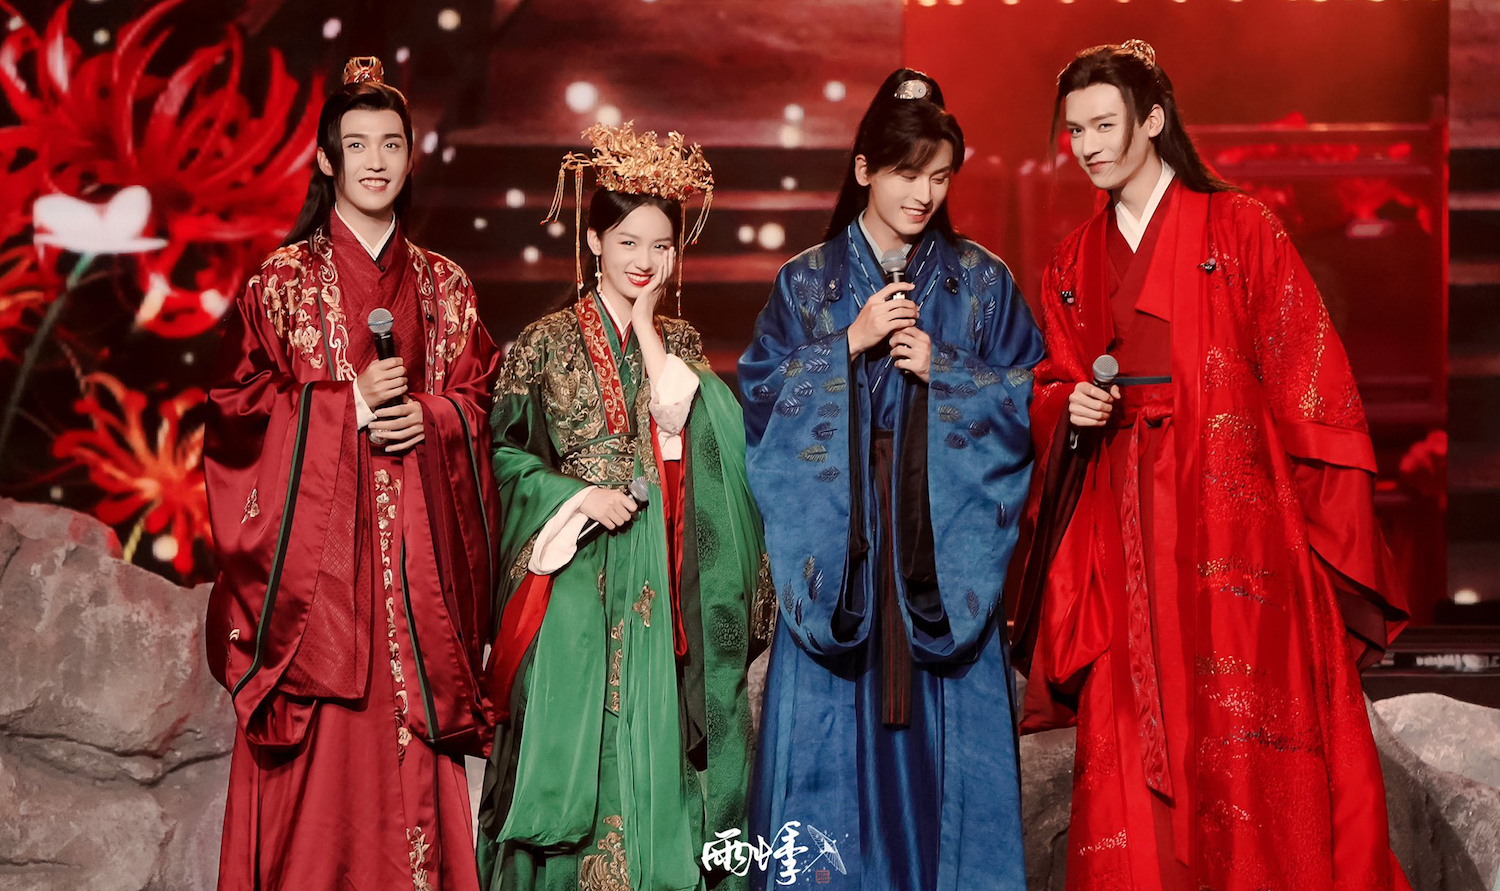

**Step1: Import libraries and Read the Image**

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 #OpenCV library for reading, writing, and saving the image

In [2]:
# define a function to read an input image
def read_image():
  img = cv2.imread('word-of-honor-concert-interview.webp')

  # in the case of color images, the decoded images will have the channels stored in BGR order
  # convert the image from BGR to RGB
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # scale the image so that the values are in range of 0 to 1
  img = img / 255.0

  return img

**Step2: Initialize Random Centroid**

In [3]:
# define a function to initialize random positions for the centroids
def initialize_means(img, clusters):
  # reshape/flatten the image to 2-d matrix
  points = img.reshape((-1, img.shape[2]))
  m, n = points.shape

  # clusters is the number of clusters or number of colors
  # means is the array of assumed centroids
  means = np.zeros((clusters, n))

  # initialize random positions of centroids
  for i in range(clusters):
    rand_indices = np.random.choice(m, size = 10, replace = False)
    means[i] = np.mean(points[rand_indices], axis = 0)

  return points, means

**Step3: Measure the Euclidean Distance Between Centroid**

In [4]:
# measure the Euclidean distance between the image array to adjust centroid
def distance(x1, y1, x2, y2):
  dist = np.square(x1 - x2) + np.square(y1 - y2)
  dist = np.sqrt(dist)
  return dist

**Step4: Applying the K-Means Clustering Algorithm**

In [5]:
# This algorithm works iteratively to find the data points which have similar colors and characteristics
def k_means(points, means, clusters):
  iterations = 10
  m, n = points.shape

  # index values that correspond to the cluster to which each pixel belongs to
  index = np.zeros(m)

  # k-mean algorithm
  while iterations > 0:
    for j in range(m):
      # initialize minimum value to a large value
      min_dist = float('inf') # used for setting a variable with an infinitely large value -> positive infinity
      temp = None

      for k in range(clusters):
        x1, y1 = points[j, 0], points[j, 1]
        x2, y2 = means[k, 0], means[k, 1]

        if distance(x1, y1, x2, y2) <= min_dist:
          min_dist = distance(x1, y1, x2, y2)
          temp = k
          index[j] = k

    for k in range(clusters):
      cluster_points = points[index == k]
      if len(cluster_points) > 0:
        means[k] = np.mean(cluster_points, axis = 0)

    iterations -= 1

  return means, index

**Step4: Compress the image**

In [6]:
# define a function to compress image
# which will take a number of means as input
# where the position of the mean has been calculated by the k-means model
# and it will return a compressed image
def compress_image(means, index, img):
  # recover the compressed image by assigning each pixel to its corresponding centroids
  centroid = np.array(means)
  recovered = centroid[index.astype(int), :]

  # get back the 3-d matrix (row, column, rgb(3))
  recovered = recovered.reshape(img.shape)

  # plot the compressed image
  plt.imshow(recovered)
  plt.show()

  # save the compressed image
  cv2.imwrite('compressed_' + str(clusters) + '_colors.png', recovered)

**Step5: Drivers Code**

Enter the number of colors in the compressed image (default = 16): 16


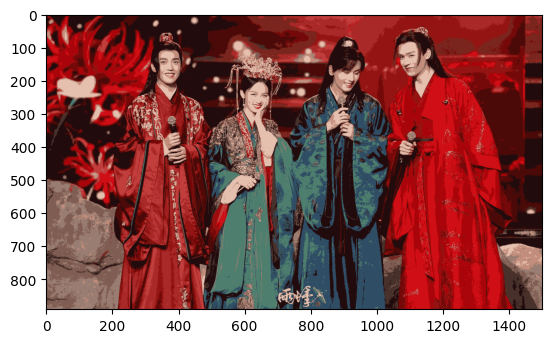

In [8]:
# driver code
# call the function in a consecutive manner to compress the image
if __name__ == '__main__':
  img = read_image()

  clusters = 16
  clusters = int(input('Enter the number of colors in the compressed image (default = 16): '))

  points, means = initialize_means(img, clusters)
  means, index = k_means(points, means, clusters)

  compress_image(means, index, img)